# Regressão Linear

## Conceito Fundamental

A Regressão Linear é um algoritmo de aprendizado de máquina cujo objetivo principal é encontrar a melhor reta que atravessa os pontos de dados disponíveis. Este método busca estabelecer uma relação linear entre as variáveis de entrada e saída, permitindo realizar previsões precisas sobre novos dados.

## Aprendizado Supervisionado

![Capa](../Assets/linear_regression/input.png)

A Regressão Linear é classificada como um algoritmo de **aprendizado supervisionado** (*supervised learning*). Esta caracterização se deve ao fato de que o algoritmo utiliza um conjunto de dados de treinamento contendo tanto as *features* de entrada quanto os *targets* de saída correspondentes. Durante o processo de treinamento, o modelo aprende a mapear as relações entre estas entradas e saídas conhecidas.

## Modelo Matemático

Uma vez que o modelo é treinado, ele se torna capaz de prever valores $\hat{y}$ (*y-hat*) para novos inputs $x$. Esta previsão pode ser representada matematicamente pela seguinte função:

![Capa](../Assets/linear_regression/w_e_b.png)

$$f(x) = wx + b$$

Onde:
- $f(x)$ ou $\hat{y}$ representa o valor previsto
- $w$ é o coeficiente angular (*slope*) da reta
- $b$ é o intercepto (*intercept*) da reta
- $x$ é a *feature* de entrada

## Parâmetros do Modelo

Os valores escolhidos para os parâmetros $w$ e $b$ são fundamentais, pois determinam completamente o comportamento do modelo. Especificamente, estes parâmetros definem o valor da predição $\hat{y}_i$ para cada exemplo $i$, baseado na *feature* de entrada $x_i$ correspondente. A otimização destes parâmetros durante o treinamento é o que permite ao modelo realizar previsões precisas.

## Função de Custo

Para encontrar os melhores valores para $w$ e $b$, reduzimos o que chamamos de **função de custo** (*cost function*). O objetivo é escolher valores de $w$ e $b$ de maneira que a predição $\hat{y}_i$ seja o mais próxima possível do valor real $y_i$ para todos os exemplos do conjunto de treinamento.

### Construção da Função de Custo

A função de custo funciona comparando o valor real $y_i$ com o valor previsto $\hat{y}_i$. A diferença entre esses valores é expressa como:

$$\hat{y}_i - y_i$$

Esta diferença é denominada **erro** (*error*) da predição.

Para obter uma métrica mais robusta, elevamos esse erro ao quadrado. Isso possui dois propósitos importantes: anular os valores negativos (garantindo que erros positivos e negativos não se cancelem) e penalizar mais intensamente erros maiores:

$$(\hat{y}_i - y_i)^2$$

Como desejamos quantificar o erro sobre todo o conjunto de dados, somamos os erros quadráticos de todos os exemplos de treinamento:

$$\sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

onde $m$ representa o número total de exemplos de treinamento (*training examples*) ou pontos de dados (*datapoints*).

Por fim, calculamos a média desses erros dividindo por $2m$. A escolha de $2m$ ao invés de apenas $m$ tem o intuito de simplificar a matemática no futuro, especialmente ao calcular a derivada parcial da função de custo.

Como $\hat{y}_i$ pode ser representado como $f(x_i)$, a **função de custo** completa é expressa como:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f(x_i) - y_i)^2$$

Esta função, conhecida como **Erro Quadrático Médio** (*Mean Squared Error* - MSE), é a função de custo mais comumente utilizada em problemas de Regressão Linear.

## Gradient Descent

Para minimizar a função de custo, utilizamos um algoritmo chamado **Gradient Descent** (*Descida do Gradiente*). O processo é relativamente simples: começamos com valores iniciais para $w$ e $b$ (comumente $w = 0$ e $b = 0$).

Em seguida, atualizamos repetidamente os parâmetros $w$ e $b$ em pequenos passos com o objetivo de reduzir o custo. Continuamos esse processo iterativo até alcançarmos o menor custo possível (mínimo local). Quando o algoritmo atinge esse ponto, dizemos que ele **convergiu**.

![Gradient Descent](../Assets/linear_regression/gradient.png)

O processo pode ser comparado a descer uma montanha: cada passo nos leva mais perto do fundo do vale. A direção em cada etapa é determinada pelo **gradiente**, que sempre aponta na direção da maior subida (*steepest ascent*).

![Gradient Descent Steps](../Assets/linear_regression/steps.png)

Para minimizar o custo, movemos na direção oposta ao gradiente, ou seja, damos passos descendo a montanha (*downhill*).

### Fórmula do Gradient Descent

A atualização dos parâmetros em cada iteração segue as seguintes equações:

$w = w - \alpha \frac{\partial J(w,b)}{\partial w}$

$b = b - \alpha \frac{\partial J(w,b)}{\partial b}$

Onde:
- $w$ e $b$ são atualizados simultaneamente em cada iteração
- $\alpha$ é a **taxa de aprendizado** (*learning rate*)
- $\frac{\partial J(w,b)}{\partial w}$ e $\frac{\partial J(w,b)}{\partial b}$ são as derivadas parciais da função de custo

### Taxa de Aprendizado (Learning Rate)

A escolha de um bom valor para $\alpha$ é crucial:

- **$\alpha$ muito pequeno**: O algoritmo dará passos muito curtos, tornando a convergência lenta e demorada
- **$\alpha$ muito grande**: O algoritmo pode "saltar" sobre o mínimo, falhando em convergir ou até divergindo

![Learning Rate](../Assets/linear_regression/alpha.png)

## Cálculo das Derivadas Parciais

Para implementar o Gradient Descent, precisamos calcular as derivadas parciais da função de custo $J(w,b)$ com relação a $w$ e $b$. Começamos relembrando nossa função de custo:

$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f(x_i) - y_i)^2$

Como $f(x_i) = wx_i + b$, podemos reescrever:

$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ((wx_i + b) - y_i)^2$

### Derivada Parcial com relação a $w$

Aplicando a regra da cadeia para derivar $J(w,b)$ com relação a $w$:

$\frac{\partial J(w,b)}{\partial w} = \frac{\partial}{\partial w} \left[\frac{1}{2m} \sum_{i=1}^{m} ((wx_i + b) - y_i)^2\right]$

A constante $\frac{1}{2m}$ pode sair da derivada:

$\frac{\partial J(w,b)}{\partial w} = \frac{1}{2m} \sum_{i=1}^{m} \frac{\partial}{\partial w} ((wx_i + b) - y_i)^2$

Aplicando a regra da cadeia: $\frac{d}{dx}[g(x)]^2 = 2g(x) \cdot g'(x)$

$\frac{\partial J(w,b)}{\partial w} = \frac{1}{2m} \sum_{i=1}^{m} 2((wx_i + b) - y_i) \cdot \frac{\partial}{\partial w}((wx_i + b) - y_i)$

Como $\frac{\partial}{\partial w}((wx_i + b) - y_i) = x_i$:

$\frac{\partial J(w,b)}{\partial w} = \frac{1}{2m} \sum_{i=1}^{m} 2((wx_i + b) - y_i) \cdot x_i$

O fator $2$ cancela com o $2$ do denominador:

$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} x_i \big((w x_i + b) - y_i\big)$

Substituindo $wx_i + b$ por $f(x_i)$:

$\boxed{\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} x_i(f(x_i) - y_i) }$

### Derivada Parcial com relação a $b$

Seguindo o mesmo processo para $b$:

$\frac{\partial J(w,b)}{\partial b} = \frac{\partial}{\partial b} \left[\frac{1}{2m} \sum_{i=1}^{m} ((wx_i + b) - y_i)^2\right]$

$\frac{\partial J(w,b)}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m} \frac{\partial}{\partial b} ((wx_i + b) - y_i)^2$

Aplicando a regra da cadeia:

$\frac{\partial J(w,b)}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m} 2((wx_i + b) - y_i) \cdot \frac{\partial}{\partial b}((wx_i + b) - y_i)$

Como $\frac{\partial}{\partial b}((wx_i + b) - y_i) = 1$:

$\frac{\partial J(w,b)}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m} 2((wx_i + b) - y_i) \cdot 1$

Simplificando:

$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ((wx_i + b) - y_i)$

Substituindo $(wx_i + b)$ por $f(x_i)$:

$\boxed{\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f(x_i) - y_i)}$

### Algoritmo Completo

Com as derivadas calculadas, o algoritmo de Gradient Descent para Regressão Linear fica:

**Repetir até convergência:**

$w = w - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} x_i(f(x_i) - y_i) $

$b = b - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (f(x_i) - y_i)$

Onde $f(x_i) = wx_i + b$

> **Nota importante**: Os parâmetros $w$ e $b$ devem ser atualizados **simultaneamente** em cada iteração, ou seja, calculamos ambas as derivadas com os valores antigos antes de atualizar qualquer parâmetro.

# Agora, abaixo terá um exemplo utilizando código Python

In [1]:
# Importações das Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importação do nosso DataSet
training_set = pd.read_csv('../Datasets/Salary_Data.csv')

In [3]:
# Definições do nosso Parameter e Target
X_train = training_set['YearsExperience'].values
y_train = training_set['Salary'].values

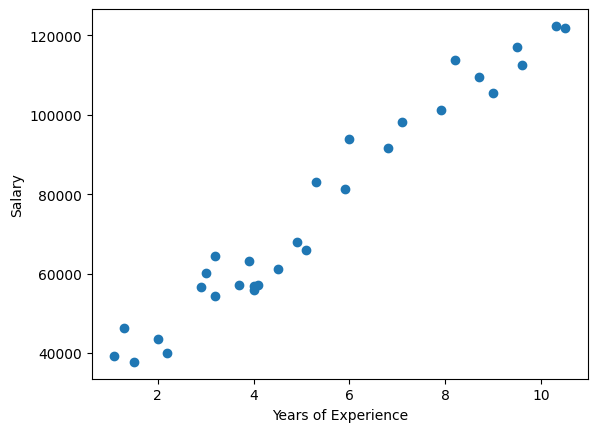

In [4]:
# Visualização Scatter do Parameter com o Target
plt.scatter(X_train, y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
# Precisamos de três funções principais para implementar a regressão linear:
# 1) Cost function: Calcula o quão bom o modelo está, utilizando o Mean Squared Error (MSE), que mede o erro médio ao quadrado entre os valores previstos e os valores reais.
#
# 2) Gradient function: Calcula as derivadas da cost function em relação aos parâmetros w e b.
#
# 3) Gradient descent function: Utiliza os gradientes calculados pela gradient function para atualizar os parâmetros w e b a cada iteração, com o objetivo de minimizar o erro.

def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0

    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum += cost

    total_cost = (1/(2*m)) * cost_sum
    return total_cost


def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b

        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db


def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")

    return w, b

In [6]:
# Indica o Learning Rate e a quantidade de iterations
learning_rate = 0.01
iterations = 10000
# Calcula o Gradient Descent de fato
final_w, final_b = gradient_descent(
    X_train, y_train, learning_rate, iterations)
print(f"w: {final_w:.4f}, b: {final_b:.4f}")

Iteration 0: Cost 1344612525.8413548
Iteration 1: Cost 582933639.1249903
Iteration 2: Cost 278595825.9816312
Iteration 3: Cost 156901936.81054005
Iteration 4: Cost 108149191.53202362
Iteration 5: Cost 88526795.5063979
Iteration 6: Cost 80538511.12387824
Iteration 7: Cost 77197055.8093798
Iteration 8: Cost 75711992.7100282
Iteration 9: Cost 74968933.0700283
Iteration 10: Cost 74522833.02695376
Iteration 11: Cost 74195957.63300419
Iteration 12: Cost 73917324.17093241
Iteration 13: Cost 73658582.39816462
Iteration 14: Cost 73408407.74554898
Iteration 15: Cost 73162275.01092048
Iteration 16: Cost 72918374.39160368
Iteration 17: Cost 72675980.51521407
Iteration 18: Cost 72434801.09739313
Iteration 19: Cost 72194716.82236984
Iteration 20: Cost 71955677.46187694
Iteration 21: Cost 71717660.38925987
Iteration 22: Cost 71480654.01166648
Iteration 23: Cost 71244651.15349762
Iteration 24: Cost 71009646.41398282
Iteration 25: Cost 70775635.11185879
Iteration 26: Cost 70542612.86387192
Iteration 27

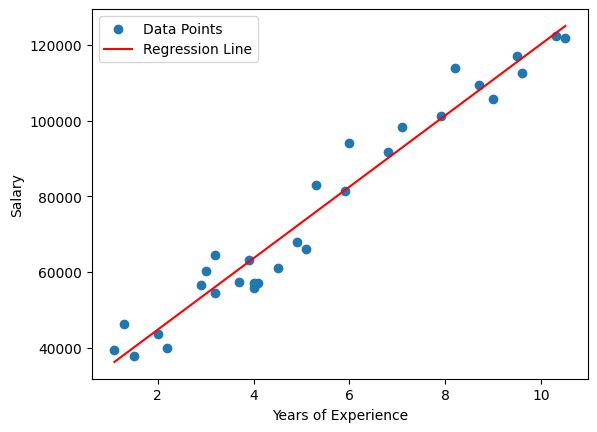

In [7]:
# Visualiza a Linha de Regressão
plt.scatter(X_train, y_train, label='Data Points')

X_vals = np.linspace(min(X_train), max(X_train), 100)
y_vals = final_w * X_vals + final_b
plt.plot(X_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Otimização da Regressão Linear

## Introdução

Após implementar o algoritmo básico de Regressão Linear com Gradient Descent, dois desafios comuns surgem na prática:

1. **Valores de custo muito elevados** - Dificultando a interpretação e convergência
2. **Escolha inadequada do learning rate** - Resultando em convergência lenta ou falha no treinamento

Este guia apresenta duas técnicas essenciais para resolver esses problemas: **normalização de features** e **teste sistemático de learning rates**.

---

## Normalização de Features

### O Problema da Escala

Quando trabalhamos com dados em escalas diferentes, o algoritmo de Gradient Descent enfrenta dificuldades. Por exemplo, se uma feature varia entre 0 e 100 e outra entre 0 e 100.000, os gradientes terão magnitudes muito diferentes, causando:

- **Convergência lenta**: O algoritmo precisa de muitas iterações
- **Instabilidade numérica**: Valores de custo extremamente grandes
- **Dificuldade em escolher o learning rate**: Um α que funciona para uma feature pode ser inadequado para outra

### Solução: Z-Score Normalization

A normalização por **z-score** transforma os dados para que tenham média 0 e desvio padrão 1:

$$X_{norm} = \frac{X - \mu}{\sigma}$$

Onde:
- $\mu$ é a média dos dados
- $\sigma$ é o desvio padrão dos dados

### Implementação

```python
def normalize_features(X):
    """Normaliza os dados usando z-score"""
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm
```

**Parâmetros:**
- `X`: Array com os dados originais

**Retorno:**
- `X_norm`: Dados normalizados

### Benefícios da Normalização

1. **Redução drástica do custo**: De milhões para valores próximos de 0
2. **Convergência mais rápida**: Menos iterações necessárias
3. **Gradientes balanceados**: Todas as features contribuem igualmente
4. **Facilita a escolha do learning rate**: Valores típicos (0.01 a 1.0) funcionam bem

### Exemplo Prático

Antes da normalização:
```
X: min=1.10, max=10.50, mean=5.31
y: min=$37,731, max=$122,391, mean=$76,003
Custo inicial: 1,344,612,525
```

Depois da normalização:
```
X_norm: min=-1.51, max=1.86, mean=0.00
y_norm: min=-1.42, max=1.72, mean=0.00
Custo inicial: 0.499
```

---

## Otimização do Learning Rate

### O Dilema do Learning Rate

O learning rate ($\alpha$) controla o tamanho dos passos que o algoritmo dá em direção ao mínimo. A escolha deste valor é crítica:

| Learning Rate | Comportamento | Resultado |
|---------------|---------------|-----------|
| **Muito pequeno** | Passos minúsculos | Convergência muito lenta |
| **Adequado** | Passos balanceados | Convergência eficiente |
| **Muito grande** | Passos excessivos | Oscilação ou divergência |

### Estratégia de Teste Sistemático

Em vez de escolher arbitrariamente, testamos vários valores e selecionamos o melhor baseado em métricas de performance.

### Implementação

```python
def test_learning_rates(X, y):
    """Testa diferentes learning rates para encontrar o melhor"""
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    iterations = 5000

    print("="*60)
    print("TESTANDO DIFERENTES LEARNING RATES")
    print("="*60)

    results = []

    for lr in learning_rates:
        print(f"\n--- Testing α = {lr} ---")
        w, b, history = gradient_descent(
            X, y, lr, iterations, print_every=1000)

        # Calcula R²
        predictions = w * X + b
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        results.append({
            'lr': lr,
            'final_cost': history[-1],
            'r2': r2,
            'w': w,
            'b': b
        })

        print(f"Final cost: {history[-1]:.6f}, R²: {r2:.4f}")

    # Seleciona o melhor resultado
    best = max(results, key=lambda x: x['r2'])
    print("\n" + "="*60)
    print(f"MELHOR LEARNING RATE: α = {best['lr']}")
    print(f"R² = {best['r2']:.4f}")
    print("="*60)

    return best['lr']
```

### Detalhamento do Código

#### 1. Definição dos Candidatos

```python
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
```

Testamos valores em **escala logarítmica**, cobrindo desde valores muito conservadores até agressivos.

#### 2. Treinamento com Cada Candidato

```python
for lr in learning_rates:
    w, b, history = gradient_descent(X, y, lr, iterations, print_every=1000)
```

Cada learning rate é testado com o mesmo número de iterações para comparação justa.

#### 3. Cálculo do R² Score

O **coeficiente de determinação** ($R^2$) mede o quão bem o modelo explica a variabilidade dos dados:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

Onde:
- $SS_{res} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$ (soma dos quadrados dos resíduos)
- $SS_{tot} = \sum_{i=1}^{m} (y_i - \bar{y})^2$ (soma total dos quadrados)

```python
predictions = w * X + b
ss_res = np.sum((y - predictions) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
```

#### Interpretação do R²:

- R² = 1.0: Modelo perfeito (explica 100% da variância)
- R² = 0.95: Excelente (explica 95% da variância)
- R² = 0.70: Bom (explica 70% da variância)
- R² = 0.50: Médio (explica 50% da variância)
- R² < 0.30: Ruim (modelo pouco preditivo)
- R² < 0: Modelo pior que simplesmente usar a média

#### 4. Armazenamento dos Resultados

```python
pythonresults.append({
    'lr': lr,
    'final_cost': history[-1],
    'r2': r2,
    'w': w,
    'b': b
})
```

Cada teste é armazenado em um dicionário contendo todas as métricas relevantes.

#### 5. Seleção do Melhor Learning Rate

```python
pythonbest = max(results, key=lambda x: x['r2'])
```

Utilizamos o R² como critério de seleção, escolhendo o learning rate que maximiza esta métrica.

# Código na Prática!

In [8]:
# Código Bônus - Normalização e Learning Rate Adequado

def normalize_features(X):
    """Normaliza os dados usando z-score"""
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm, mean, std


def test_learning_rates(X, y):
    """Testa diferentes learning rates para encontrar o melhor"""
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    iterations = 5000

    print("="*60)
    print("TESTANDO DIFERENTES LEARNING RATES")
    print("="*60)

    results = []

    for lr in learning_rates:
        print(f"\n--- Testing α = {lr} ---")
        w, b = gradient_descent(
            X, y, lr, iterations)

        # R²
        predictions = w * X + b
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        results.append({
            'lr': lr,
            'r2': r2,
            'w': w,
            'b': b
        })

        print(f"R²: {r2:.4f}")

    # Melhor resultado
    best = max(results, key=lambda x: x['r2'])
    print("\n" + "="*60)
    print(f"MELHOR LEARNING RATE: α = {best['lr']}")
    print(f"R² = {best['r2']:.4f}")
    print("="*60)

    return best['lr']

In [9]:
# Normaliza os dados
X_norm, x_mean, x_std = normalize_features(X_train)
y_norm, y_mean, y_std = normalize_features(y_train)

print("\nDADOS NORMALIZADOS")
print(
    f"X_norm: min={X_norm.min():.2f}, max={X_norm.max():.2f}, mean={X_norm.mean():.2f}")
print(
    f"y_norm: min={y_norm.min():.2f}, max={y_norm.max():.2f}, mean={y_norm.mean():.2f}")

# Testa diferentes learning rates
best_lr = test_learning_rates(X_norm, y_norm)

# Treina novamente só que agora com o melhor learning rate
print("\n" + "="*60)
print(f"TREINAMENTO FINAL COM α = {best_lr}")
print("="*60)

w_initial = 0
b_initial = 0
iterations = 10000


DADOS NORMALIZADOS
X_norm: min=-1.51, max=1.86, mean=-0.00
y_norm: min=-1.42, max=1.72, mean=0.00
TESTANDO DIFERENTES LEARNING RATES

--- Testing α = 0.001 ---
Iteration 0: Cost 0.49904352181418854
Iteration 1: Cost 0.49808895562827055
Iteration 2: Cost 0.49713629762015826
Iteration 3: Cost 0.49618554397540404
Iteration 4: Cost 0.4952366908871859
Iteration 5: Cost 0.4942897345562909
Iteration 6: Cost 0.49334467119110137
Iteration 7: Cost 0.49240149700757896
Iteration 8: Cost 0.4914602082292493
Iteration 9: Cost 0.49052080108718765
Iteration 10: Cost 0.4895832718200029
Iteration 11: Cost 0.4886476166738234
Iteration 12: Cost 0.4877138319022809
Iteration 13: Cost 0.4867819137664968
Iteration 14: Cost 0.48585185853506624
Iteration 15: Cost 0.48492366248404317
Iteration 16: Cost 0.483997321896926
Iteration 17: Cost 0.4830728330646428
Iteration 18: Cost 0.4821501922855351
Iteration 19: Cost 0.48122939586534486
Iteration 20: Cost 0.48031044011719853
Iteration 21: Cost 0.4793933213615927
Ite

In [10]:
# Faz o Gradient Descent agora com o custo muito menor (melhor)
w_final, b_final = gradient_descent(
    X_norm, y_norm, best_lr, iterations
)

Iteration 0: Cost 0.49047828119177206
Iteration 1: Cost 0.48114604458782784
Iteration 2: Cost 0.47199951949230223
Iteration 3: Cost 0.4630350102461776
Iteration 4: Cost 0.45424889473405056
Iteration 5: Cost 0.44563762292061515
Iteration 6: Cost 0.43719771541626695
Iteration 7: Cost 0.4289257620712553
Iteration 8: Cost 0.4208184205978096
Iteration 9: Cost 0.41287241521968515
Iteration 10: Cost 0.4050845353485855
Iteration 11: Cost 0.39745163428692076
Iteration 12: Cost 0.38997062795638315
Iteration 13: Cost 0.38263849365182323
Iteration 14: Cost 0.37545226881992394
Iteration 15: Cost 0.36840904986217965
Iteration 16: Cost 0.36150599096169433
Iteration 17: Cost 0.35474030293332875
Iteration 18: Cost 0.34810925209672755
Iteration 19: Cost 0.3416101591717748
Iteration 20: Cost 0.3352403981960286
Iteration 21: Cost 0.3289973954636996
Iteration 22: Cost 0.3228786284857441
Iteration 23: Cost 0.3168816249706499
Iteration 24: Cost 0.311003961825506
Iteration 25: Cost 0.30524326417695063
Iterati

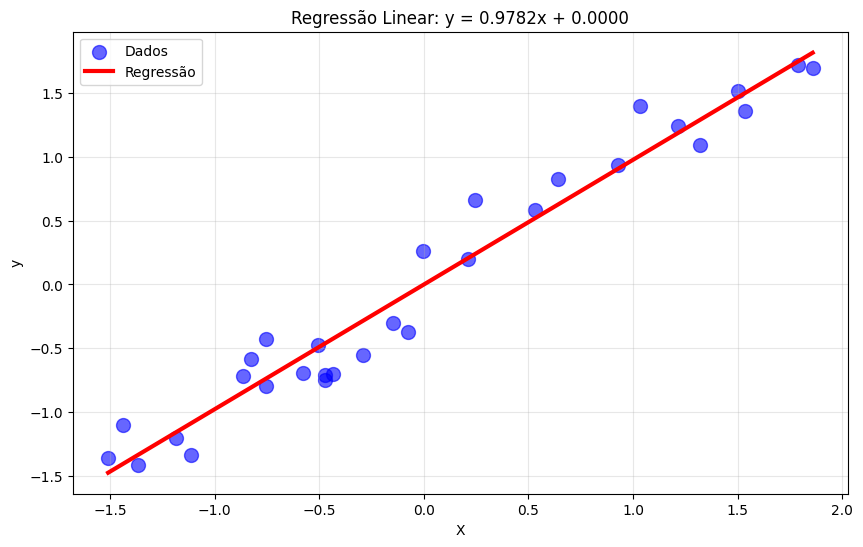

In [11]:
# Função para visualizar a Regression Line
def plot_regression(X, y, w, b):
    """Plota dados e linha de regressão - BEM SIMPLES"""

    # Calcula predições
    predictions = w * X + b

    # Plota
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', s=100, alpha=0.6, label='Dados')
    plt.plot(X, predictions, color='red', linewidth=3, label='Regressão')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Regressão Linear: y = {w:.4f}x + {b:.4f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


plot_regression(X_norm, y_norm, w_final, b_final)